shape of x_train: (60000, 28, 28)
shape of x_test: (10000, 28, 28)
shape of y_train: (60000,)
shape of y_test: (10000,)


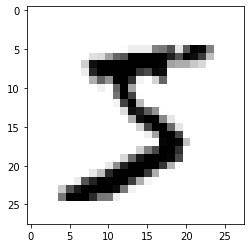

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

mnistDB = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnistDB.load_data()

print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

plt.imshow(x_train[0],cmap="binary")

x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255


cnnModel_MNIST=keras.models.Sequential()




In [ ]:
cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=x_train.shape[1:]))
cnnModel_MNIST.add(keras.layers.Conv2D(64,(3,3),activation="relu"))

In [ ]:
cnnModel_MNIST.add(keras.layers.MaxPooling2D((2,2)))

In [ ]:
cnnModel_MNIST.add(keras.layers.Dropout(0.25))

In [ ]:
cnnModel_MNIST.add(keras.layers.Flatten())

In [ ]:
cnnModel_MNIST.add(keras.layers.Dense(128,activation="relu"))

In [ ]:
cnnModel_MNIST.add(keras.layers.Dropout(0.25))

In [ ]:
cnnModel_MNIST.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
cnnModel_MNIST.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                        

In [ ]:
cnnModel_MNIST.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
cnnModel_MNIST.fit(x_train,y_train,epochs=1,batch_size=16)

3750/3750 [==============================] - 21s 3ms/step - loss: 0.1258 - accuracy: 0.9614


In [ ]:
test_loss,test_accuracy = cnnModel_MNIST.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9890
